## Estadística Aplicada
Sesión 6 - 25 agosto

Cecilia Sarahí Gutiérrez Padilla   1953437   gpo 43

## Repaso de MCO

In [35]:
# librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## especializada
import statsmodels.formula.api as smf

In [36]:
# Datos
datos= pd.read_excel('modelolineal.xlsx')

In [37]:
datos = datos[['X', 'Y']]

In [38]:
# estadísticas descriptivas
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


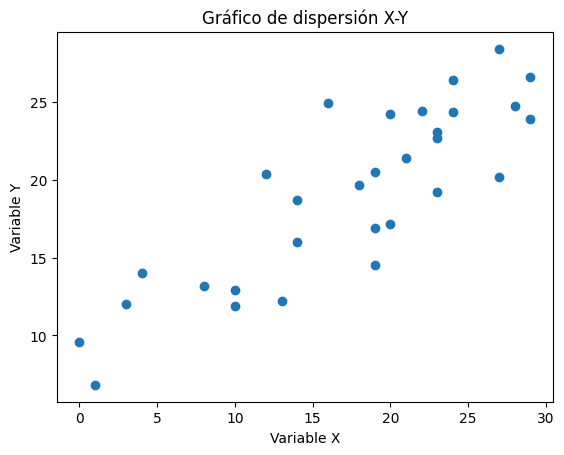

In [39]:
## grafico de dispersion
plt.scatter(datos['X'], datos['Y'])
plt.title('Gráfico de dispersión X-Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

El gráfico muestra una regresión lineal por lo que tiene sentido estimar un modelo de mínimos cuadrados ordinarios

Vamos a estimar $Y = \beta_0 + \beta_1X$ 

In [40]:
## 1 especifica el modelo
reg0 = smf.ols(formula='Y~X', data=datos)
## 2 estima el modelo
results0= reg0.fit()
## 3 mostramos el modelo estimado
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        16:01:11   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

Intercepto: p_value < alfa

Rechazamos Ho, significa que el intercepto es distinto de cero estadísticamente hablando. "Estadísticamente significativo" con un valor de 8.96

"X": p_value < alfa

Rechazamos Ho, significa que "X" afecta a "Y". En promedio cuando "X" aumento 1, "Y" aumenta 0.58


Bondad de Ajuste R^2

MAD= Desviación absoluta media

MSD= Desviación cuadrática media

MAPE= Error porcentual absoluto medio

In [41]:
## primero obtenemos el valor poronosticado
datos['Y_hat'] = results0.predict(datos)

In [42]:
datos.head()

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [43]:
## calcular el MAD
MAD0 = (datos['Y']-datos['Y_hat']).abs().mean()

In [44]:
print('El MAD del modelo es:', MAD0)

El MAD del modelo es: 2.3543034803789946


Vamos a evaluar $Y = \beta_0 + \beta_1X + \beta_2 X^2$

In [45]:
## Calcular la X cuadrada
datos['X2'] = datos['X']**2

In [46]:
## 1 Especificamos
reg1 = smf.ols(formula='Y~X+X2', data=datos)
## 2 Estimamos
results1 = reg1.fit()
## 3 Mostramos
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        16:01:12   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [47]:
datos['Y_hat1']= results1.predict(datos)

In [48]:
MAD1 = (datos['Y']-datos['Y_hat1']).abs().mean()

In [49]:
print(MAD0.round(3), MAD1.round(3))

2.354 2.355


El mejor modelo es del menor valor del MAD, eso significa que el modelo $Y=\beta_0 + \beta_1 X$ es el mejor modelo 

## Validación Cruzada

In [50]:
datos= pd.read_excel('modelolineal.xlsx')
datos= datos[['X', 'Y']]


In [51]:
datos['X2']= datos['X']**2

In [52]:
datos.head()

,X,Y,X2
0,23,19.246957,529
1,19,16.878501,361
2,27,20.187237,729
3,13,12.176789,169
4,21,21.420112,441


In [53]:
##conjunto entrenamiento y conjunto de prueba
#conjunto entrenamiento
train_set = datos.iloc[:20]
#conjunto evaluacion
test_set = datos.iloc[20:]

$Y= \beta_0 + \beta_1 X $

In [54]:
## estimar conjunto de entrenamiento
#1
regm1 =smf.ols(formula='Y~X', data=train_set)
#2
resultsm1 =regm1.fit()

In [55]:
## pronosticar
test_set['Y_est1']= resultsm1.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11632\1800454135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_est1']= resultsm1.predict(test_set)


In [56]:
test_set

,X,Y,X2,Y_est1
20,0,9.544102,0,9.233587
21,20,24.230330,400,20.117395
22,24,26.417826,576,22.294157
23,23,23.066723,529,21.749966
24,8,13.145005,64,13.587110
25,24,24.385156,576,22.294157
26,10,12.934102,100,14.675491
27,4,14.002469,16,11.410349
28,29,26.599047,841,25.015109
29,10,11.910387,100,14.675491


In [61]:
pip install scikit-learn


                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.9 MB/s eta 0:00:05
                                              0.2/9.2 MB 2.4 MB/s eta 0:00:04
     -                                        0.3/9.2 MB 2.6 MB/s eta 0:00:04
     --                                       0.5/9.2 MB 3.1 MB/s eta 0:00:03
     ---                                      0.7/9.2 MB 3.3 MB/s eta 0:00:03
     ----                                     0.9/9.2 MB 3.5 MB/s eta 0:00:03
     ----                                     1.1/9.2 MB 3.6 MB/s eta 0:00:03
     -----                                    1.3/9.2 MB 3.6 MB/s eta 0:00:03
     ------                                   1.4/9.2 MB 3.5 MB/s eta 0:00:03
     ------                                   1.6/9.2 MB 3.5 MB/s eta 0:00:03
     -------                                  1.8/9.2 MB 3.5 MB/s eta 0:00:03
     --------                                 1.9/9.2 MB 3.5 MB/s eta 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.metrics import mean_absolute_error as MAD

In [65]:
MADm1=MAD(test_set['Y'], test_set['Y_est1'])

In [66]:
print(MADm1)

2.107953156470991


modelo $Y= \beta_0 + \beta_1 X + \beta_2 X^2$

In [68]:
#estimar
#1
regm2 = smf.ols(formula= 'Y~X+X2', data= train_set)
#2
resultsm2= regm2.fit()

In [70]:
#pronosticamos
test_set['Y_est2']= resultsm2.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11632\2034159319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_est2']= resultsm2.predict(test_set)


In [71]:
## calculamos MAD
MADm2= MAD(test_set['Y'], test_set['Y_est2'])

In [72]:
print(MADm2)

2.334061668653748


In [73]:
print(MADm2)

2.334061668653748


In [74]:
print ('Validación cruzada', MADm1, MADm2)

Validación cruzada 2.107953156470991 2.334061668653748


In [75]:
print (MAD0, MAD1)

2.3543034803789946 2.3553110792438803
